<a href="https://colab.research.google.com/github/Mohammed-Abdul-Rafe-Sajid/ML-LAB/blob/main/6_MultilinearReg_GradDesc_LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MULTILINEAR REGRESSION ON BOSTON HOUSE PRICES DATASET

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("/content/boston.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/boston.csv'

In [ ]:
df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [ ]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df = df.drop(columns=["Unnamed: 0"])

In [1]:
# Check for missing values
print(df.isnull().sum())

NameError: name 'df' is not defined

In [ ]:
# Input Data
x = df.drop(columns=["PRICE"])

# Output Data
y = df["PRICE"]


# splitting data to training and testing dataset.

#from sklearn.cross_validation import train_test_split
#the submodule cross_validation is renamed and deprecated to model_selection
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2,
                                                    random_state = 0)

print("xtrain shape : ", xtrain.shape)
print("xtest shape  : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape  : ", ytest.shape)

xtrain shape :  (404, 13)
xtest shape  :  (102, 13)
ytrain shape :  (404,)
ytest shape  :  (102,)


In [ ]:
# Fitting Multi Linear regression model to training model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

# predicting the test set results
y_pred = regressor.predict(xtest)

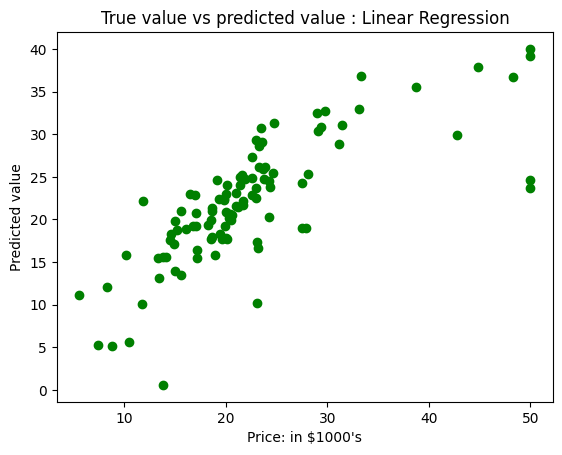

In [ ]:
# Plotting Scatter graph to show the prediction
# results - 'ytrue' value vs 'y_pred' value
import matplotlib.pyplot as plt
plt.scatter(ytest, y_pred, c = 'green')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest,y_pred)
print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)

Mean Square Error :  33.44897999767639
Mean Absolute Error :  3.8429092204444983


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv("boston.csv")   # assuming the dataset is stored as boston.csv

# Features (X) and Target (y)
X = df.drop(["Unnamed: 0", "PRICE"], axis=1)   # remove index and target
y = df["PRICE"]

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Compare Actual vs Predicted
plt.scatter(y_test, y_pred, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'boston.csv'

# LINEAR REGRESSION USING GRADIENT DESCENT ON COMPUTERS DATASET


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("/content/drive/MyDrive/CBIT/ML/FeatureEngg-Datasets/computers.csv")

In [6]:
data.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [7]:
data.columns

Index(['Units', 'Minutes'], dtype='object')

In [8]:

X = data['Units'].values
y = data['Minutes'].values
# Normalize features (important for gradient descent convergence)
X = (X - np.mean(X)) / np.std(X)

# Parameters
m = 0  # slope
c = 0  # intercept
L = 0.01  # learning rate
epochs = 1000  # iterations

n = float(len(X))  # number of data points

# Gradient Descent
for i in range(epochs):
    y_pred = m * X + c

    #compute gradients
    D_m = (-2/n) * sum(X * (y - y_pred))  # derivative wrt m
    D_c = (-2/n) * sum(y - y_pred)        # derivative wrt c
    m = m - L * D_m
    c = c - L * D_c

    if i % 100 == 0:  # print every 100 iterations
        loss = np.mean((y - y_pred) ** 2)
        print(f"Epoch {i}: m={m:.4f}, c={c:.4f}, Loss={loss:.4f}")






Epoch 0: m=0.8851, c=1.9443, Loss=11434.0714
Epoch 100: m=38.5036, c=84.5796, Loss=225.5813
Epoch 200: m=43.4926, c=95.5387, Loss=28.4470
Epoch 300: m=44.1542, c=96.9921, Loss=24.9798
Epoch 400: m=44.2419, c=97.1848, Loss=24.9188
Epoch 500: m=44.2536, c=97.2104, Loss=24.9178
Epoch 600: m=44.2551, c=97.2138, Loss=24.9177
Epoch 700: m=44.2553, c=97.2142, Loss=24.9177
Epoch 800: m=44.2553, c=97.2143, Loss=24.9177
Epoch 900: m=44.2554, c=97.2143, Loss=24.9177


In [9]:
# Final line equation
print(f"\nFinal model: y = {m:.4f}x + {c:.4f}")


Final model: y = 44.2554x + 97.2143


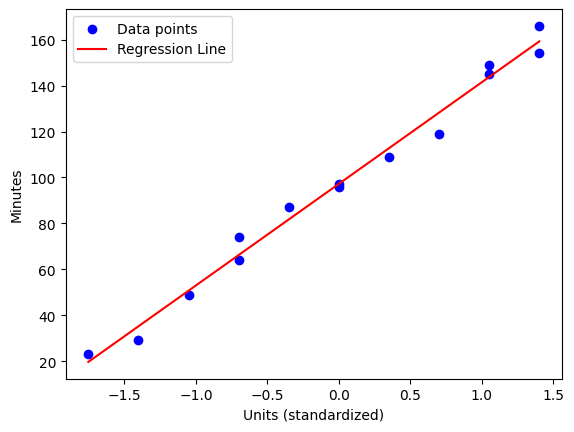

In [10]:
# Plot
plt.scatter(X, y, color='blue', label="Data points")
plt.plot(X, m*X + c, color='red', label="Regression Line")
plt.xlabel("Units (standardized)")
plt.ylabel("Minutes")
plt.legend()
plt.show()

🔹 What is Gradient Descent?

Gradient Descent is an optimization algorithm that helps us find the best parameters (slope & intercept in linear regression) by minimizing the cost function (error) step by step.

Think of it like:

You are standing on a hill (the cost function is the hill).

You want to reach the lowest point (minimum error).

You can’t jump directly, so you take small steps downhill in the direction of the steepest slope (gradient).

Each step you take reduces the error until you’re as close as possible to the minimum.

🔹 In Linear Regression

We try to fit a line:

𝑦
=
𝑚
⋅
𝑥
+
𝑏
y=m⋅x+b

m = slope

b = intercept

Cost function (we want to minimize):

𝐽
(
𝑚
,
𝑏
)
=
1
𝑛
∑
(
𝑦
pred
−
𝑦
true
)
2
J(m,b)=
n
1
	​

∑(y
pred
	​

−y
true
	​

)
2
🔹 How Gradient Descent Works

Start with random values for m and b.

Compute the gradient (slope of cost function w.r.t m & b).

Gradient tells us which direction increases error.

Update parameters by moving in the opposite direction of the gradient:

𝑚
=
𝑚
−
𝛼
⋅
∂
𝐽
∂
𝑚
m=m−α⋅
∂m
∂J
	​

𝑏
=
𝑏
−
𝛼
⋅
∂
𝐽
∂
𝑏
b=b−α⋅
∂b
∂J
	​


where α (alpha) = learning rate (step size).

Repeat until the line fits well (cost stops decreasing).

🔹 Intuition Example

Suppose you want to predict minutes based on units (your dataset).

At first, your line is random (bad fit).

Gradient descent tweaks the slope & intercept little by little until the line fits best.

⚡In short:
👉 Gradient Descent = Trial & Error + Systematic improvement until the line fits perfectly.

# Logistic Regression on Coronary heart disease dataset



In [11]:
chd=pd.read_csv("/content/chd.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/chd.csv'

In [ ]:
chd.shape

(100, 2)

In [ ]:
chd.head()

,age,chd
0,20,0
1,23,0
2,24,0
3,25,1
4,25,0


Text(0.5, 1.0, 'Age vs. Coronary Heart Disease')

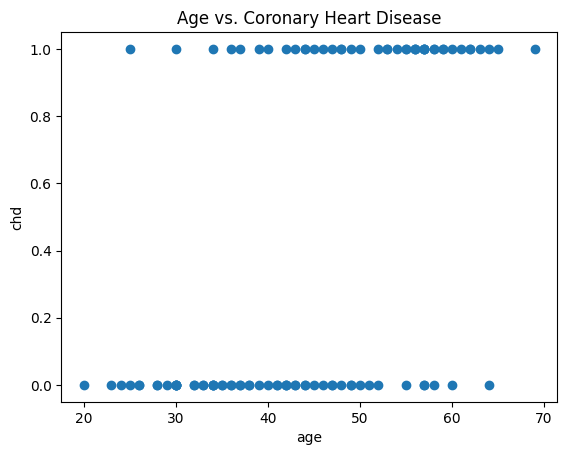

In [ ]:

plt.scatter("age","chd",data=chd)
plt.xlabel("age")
plt.ylabel("chd")
plt.title("Age vs. Coronary Heart Disease")

In [ ]:
# Importing the required class
from sklearn.model_selection import train_test_split

# Specifying the columns as predictor and target variable
predictors = ["age"]
target = "chd"

X = chd[predictors] # X contains the predictor values or input data
y = chd[target] # y contains the target labels

# Spliting the data in training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (70, 1)
Shape of y_train: (70,)
Shape of X_test: (30, 1)
Shape of y_test: (30,)


In [ ]:
# Importing the required class
from sklearn.linear_model import LogisticRegression

# Creating the object of the class LogisticRegression
model = LogisticRegression()

# Fitting the model to the training data
model.fit(X_train,y_train)

# Getting the intercept and the coefficients of the model
print("Intercept:",model.intercept_,"\nCoefficients:", model.coef_)

Intercept: [-5.6511192] 
Coefficients: [[0.11144141]]


In [ ]:
#Make Predictions#
y_pred = model.predict(X_test)

In [ ]:

# Evaluate the Model
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  1],
       [ 7, 10]])

In [ ]:
# Converting the confusion matrix into a DataFrame for better readability
pd.DataFrame(cm,columns=model.classes_,index=model.classes_)

,0,1
0,12,1
1,7,10


In [ ]:
test_accuracy=model.score(X_test, y_test)
print("Test accuracy = ", test_accuracy)

Test accuracy =  0.7333333333333333


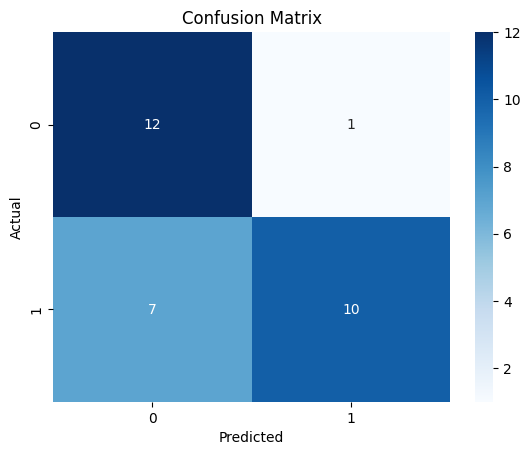

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Predicting the probabilities for each of the class labels and the final class for a new data
test=np.array([29]).reshape(1,-1)
print("\nProbabilities:",model.predict_proba(test))
print("\nChd value:",model.predict(test))


Probabilities: [[0.91828861 0.08171139]]

Chd value: [0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


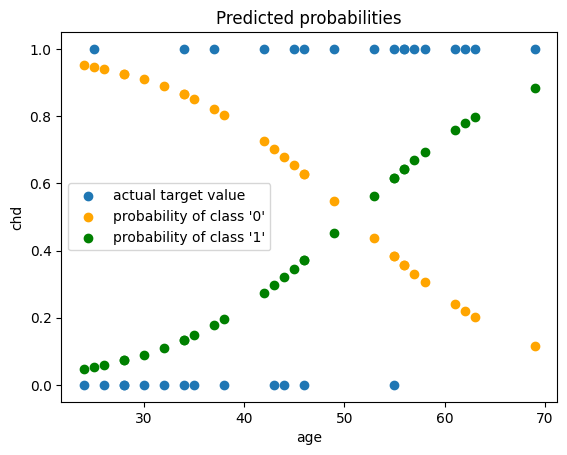

In [ ]:
# Getting the probability for class label '0' for all the samples
pred_test_0 = model.predict_proba(X_test)[:,0]

# Getting the probability for class label '1' for all the samples
pred_test_1 = model.predict_proba(X_test)[:,1]

# Plotting the actual class labels or target values for the samples
plt.scatter(X_test['age'],y_test, label = "actual target value")

# Plotting the predicted probability for class label '1' for all the samples
plt.scatter(X_test['age'],pred_test_0, label = "probability of class '0'",color = "orange", marker='o')

# Plotting the predicted probability for class label '1' for all the samples
plt.scatter(X_test['age'],pred_test_1, label = "probability of class '1'",color = "green", marker='o')

# Adding the xlabel, ylabel, title and the legend
plt.xlabel("age")
plt.ylabel("chd")
plt.title("Predicted probabilities")
plt.legend()

In [ ]:
print("Accuracy score of the model on training data:", model.score(X_train, y_train))
print("Accuracy score of the model on test data:", model.score(X_test, y_test))

Accuracy score of the model on training data: 0.7428571428571429
Accuracy score of the model on test data: 0.7333333333333333


In [ ]:
# Importing the required function
from sklearn.metrics import classification_report

# Generating the report and printing the same
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.92      0.75        13
           1       0.91      0.59      0.71        17

    accuracy                           0.73        30
   macro avg       0.77      0.76      0.73        30
weighted avg       0.79      0.73      0.73        30



# LOGISTIC REGRESSION ON PREGNANT WOMEN DIABETES DATASET

In [12]:
import pandas as pd

url = "/content/pima-indians-diabetes(1).csv.xlsx"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Use read_excel instead of read_csv
df = pd.read_excel(url, header=None, names=columns)

print("First 5 rows of the dataset:")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/pima-indians-diabetes(1).csv.xlsx'

In [ ]:
if df.iloc[0].str.contains("preg", case=False).any():
    df = df.drop(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Pregnancies               768 non-null    object
 1   Glucose                   768 non-null    object
 2   BloodPressure             768 non-null    object
 3   SkinThickness             768 non-null    object
 4   Insulin                   768 non-null    object
 5   BMI                       768 non-null    object
 6   DiabetesPedigreeFunction  768 non-null    object
 7   Age                       768 non-null    object
 8   Outcome                   768 non-null    object
dtypes: object(9)
memory usage: 54.1+ KB


In [ ]:
from sklearn.preprocessing import StandardScaler
# Step 2: Split the Data into Features and Target
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']               # Target

# Step 3: Apply Standard Scaling to the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
y = (y > 0.5).astype(int)

In [ ]:
from sklearn.model_selection import train_test_split
# Step 4: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (537, 8)
Shape of y_train: (537,)
Shape of X_test: (231, 8)
Shape of y_test: (231,)


In [ ]:
from sklearn.linear_model import LogisticRegression
# Step 5: Train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(" The confusion matrix is=")
print(cm)

 The confusion matrix is=
[[120  31]
 [ 30  50]]


 The confusion matrix is in the graphical form


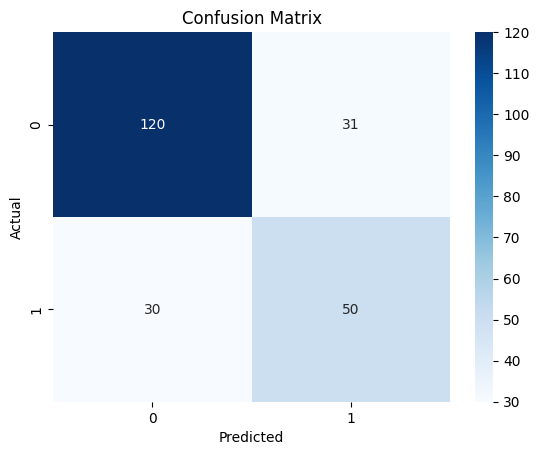

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
print(" The confusion matrix is in the graphical form")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.74


In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------------
# Load Dataset
# -----------------------------
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# -----------------------------
# Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# -----------------------------
# Create & Train Model
# -----------------------------
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# -----------------------------
# Make Predictions
# -----------------------------
y_pred = model.predict(X_test)

# -----------------------------
# Accuracy
# -----------------------------
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy =", test_accuracy)

# OR using .score()
print("Test Accuracy using .score() =", model.score(X_test, y_test))

# -----------------------------
# Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# -----------------------------
# Classification Report
# -----------------------------
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# -----------------------------
# Model Coefficients
# -----------------------------
print("\nModel Coefficients (model.coef_):")
print(model.coef_)

print("\nModel Intercept (model.intercept_):")
print(model.intercept_)


Test Accuracy = 1.0
Test Accuracy using .score() = 1.0

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Model Coefficients (model.coef_):
[[-0.40538546  0.86892246 -2.2778749  -0.95680114]
 [ 0.46642685 -0.37487888 -0.18745257 -0.72127133]
 [-0.06104139 -0.49404358  2.46532746  1.67807247]]

Model Intercept (model.intercept_):
[  8.86383271   2.20981479 -11.0736475 ]
